In [1]:
# ws03
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

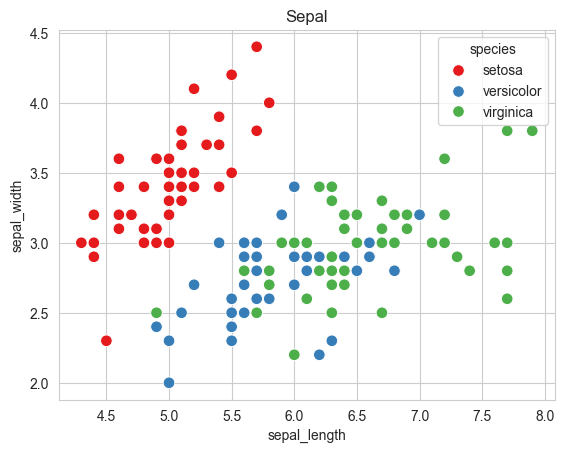

In [5]:
sns.set_style('whitegrid')
sns.scatterplot(x='sepal_length',y='sepal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Sepal')
plt.show()

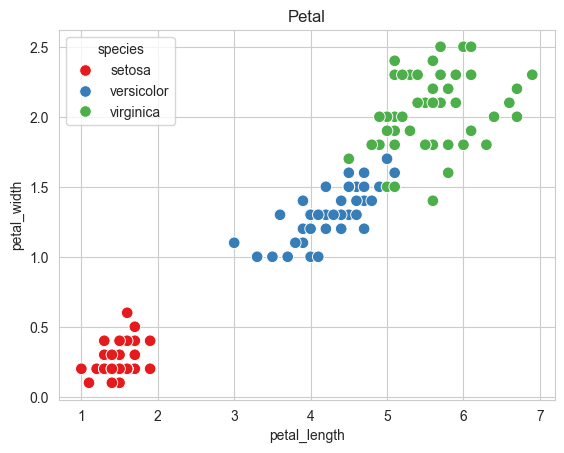

In [7]:
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Petal')
plt.show()

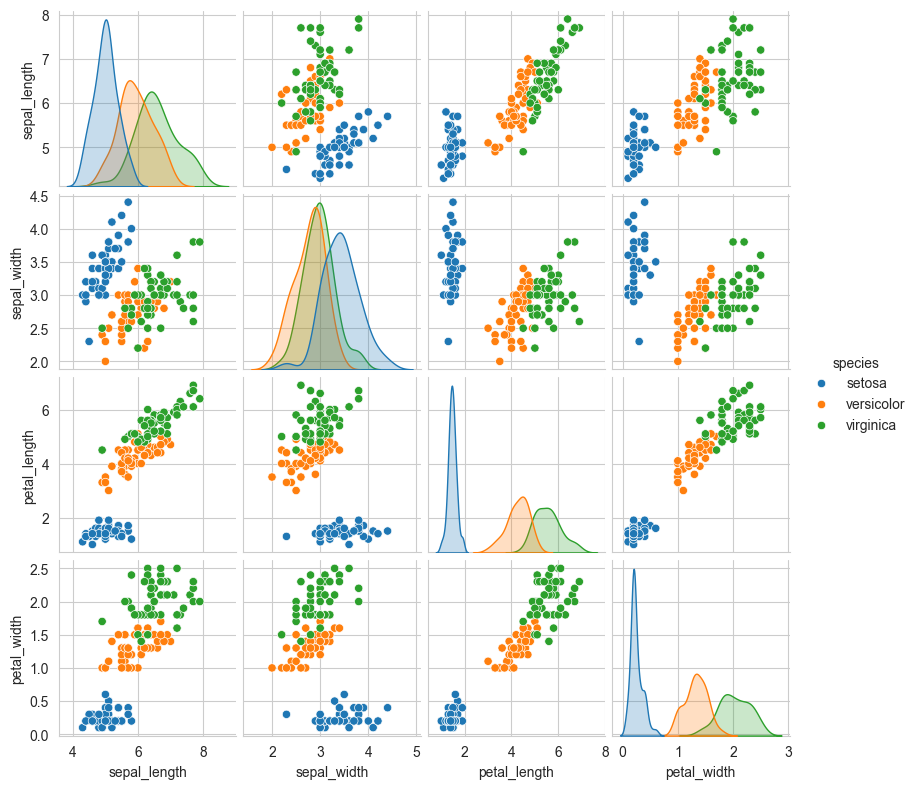

In [8]:
sns.pairplot(df, hue='species', height=2.0)
plt.show()

In [9]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

In [14]:
# ws06
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

cvs = cross_val_score(model, X, y, cv=10)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [0.933 0.933 1.    0.933 0.933 0.933 0.867 1.    1.    1.   ]
mean (%) = 95.333


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3) 

In [16]:
# ws07
import numpy as np
(label, count) = np.unique(y_test , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 17]
 ['versicolor' 8]
 ['virginica' 20]]


In [17]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.88      0.88      0.88         8
   virginica       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0  7  1]
 [ 0  1 19]]


In [18]:
y_test[(y_test == y_pred)].count()

43

In [19]:
import pandas as pd
dy = pd.DataFrame()
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred

dy[dy.result == False]

,y_test,y_pred,result
77,versicolor,virginica,False
134,virginica,versicolor,False


In [20]:
# ws07
import numpy as np

X_input = np.array([[4.7,3.6,2.0,0.8],
                    [6.5,2.5,4.8,1.4]
                   ])
X_input

array([[4.7, 3.6, 2. , 0.8],
       [6.5, 2.5, 4.8, 1.4]])

In [21]:
# model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [22]:
print(y.unique())
print(model.predict_proba(X_input).round(8))

['setosa' 'versicolor' 'virginica']
[[0.99595248 0.00404752 0.        ]
 [0.         0.98238713 0.01761287]]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [23]:
# ws08
xsp = X_input[:,:1].reshape(1,-1)[0]
ysp = X_input[:,1:2].reshape(1,-1)[0]
xsp, ysp

(array([4.7, 6.5]), array([3.6, 2.5]))

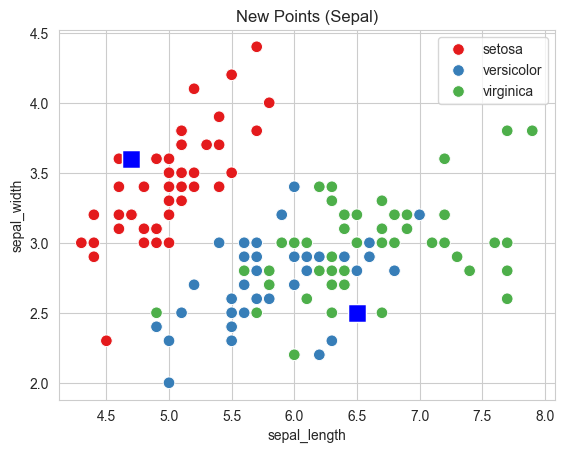

In [26]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('New Points (Sepal)')
sns.scatterplot(x=xsp, y=ysp, marker='s', color='blue', s=180)
plt.show()

In [27]:
xpe = X_input[:,2:3].reshape(1,-1)[0]
ype = X_input[:,3:4].reshape(1,-1)[0]
xpe, ype

(array([2. , 4.8]), array([0.8, 1.4]))

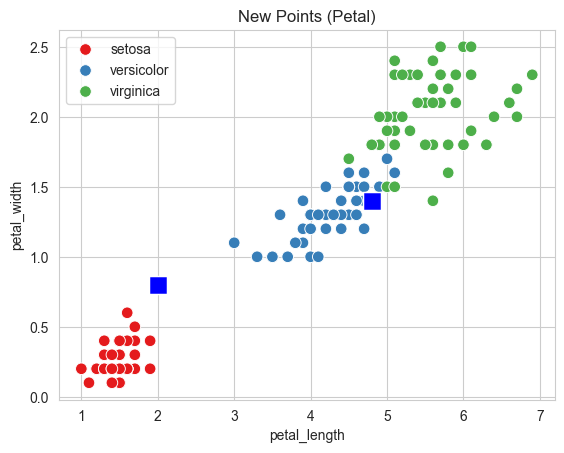

In [29]:
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('New Points (Petal)')
sns.scatterplot(x=xpe, y=ype, marker='s', color='blue', s=180)
plt.show()

In [30]:
# ws09
from sklearn.svm import SVC

model = SVC(kernel='linear') 

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.333


In [31]:
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [32]:
# ws10
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) 

cvs = cross_val_score(model, X, y, cv=10)  
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    0.933 0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 96.667


In [33]:
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [34]:
# ws11
len(X_train)

105

In [35]:
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [36]:
class_names = df.species.unique()
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Score -> 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.88      0.88      0.88         8
   virginica       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0  7  1]
 [ 0  1 19]]


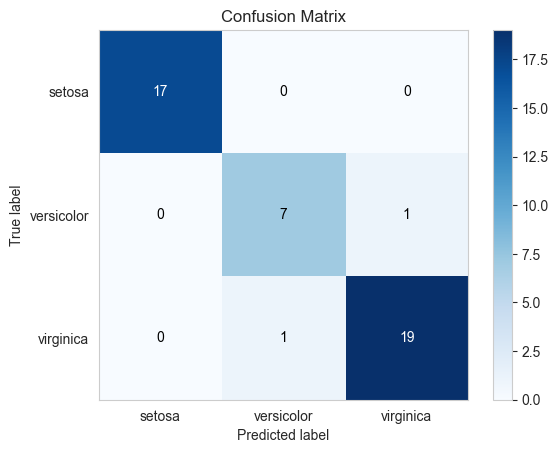

In [37]:
y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

Score: 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.88      0.88      0.88         8
   virginica       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0  7  1]
 [ 0  1 19]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

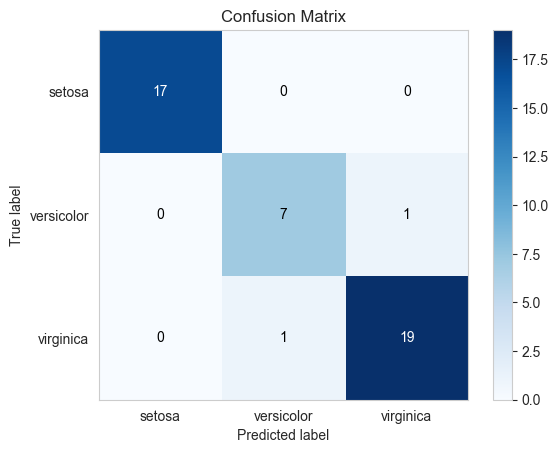

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


print('Score: {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

skplot.metrics.plot_confusion_matrix(y_test, y_predict, normalize=False)


In [39]:
# ws12
print(y.unique())

['setosa' 'versicolor' 'virginica']


In [40]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)

In [41]:
y_kmeans[:80]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [42]:
df['cluster'] = y_kmeans
df.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
147,6.5,3.0,5.2,2.0,virginica,2
1,4.9,3.0,1.4,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
23,5.1,3.3,1.7,0.5,setosa,0
70,5.9,3.2,4.8,1.8,versicolor,1
139,6.9,3.1,5.4,2.1,virginica,2
32,5.2,4.1,1.5,0.1,setosa,0
88,5.6,3.0,4.1,1.3,versicolor,1


In [43]:
df[df.cluster==0].head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [44]:

pvt = df.pivot_table(index='species',columns=['cluster'], values='petal_length',
                     fill_value=0, aggfunc='count')
pvt

cluster,0,1,2
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [45]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [46]:
x_centroids = model.cluster_centers_[:,0]
y_centroids = model.cluster_centers_[:,1]

In [47]:
x_centroids

array([5.006    , 5.9016129, 6.85     ])

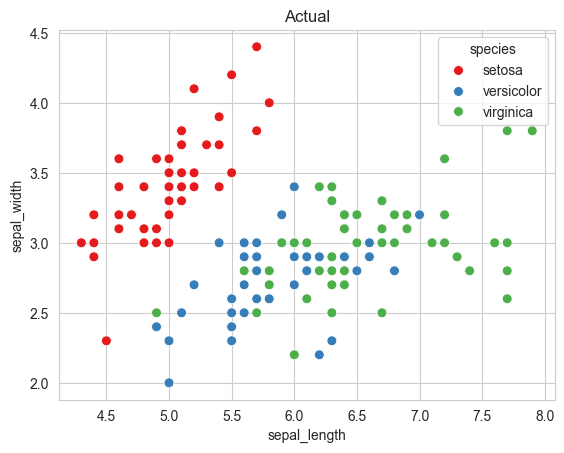

In [50]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species',s=50,palette='Set1')
plt.title('Actual')
plt.show()

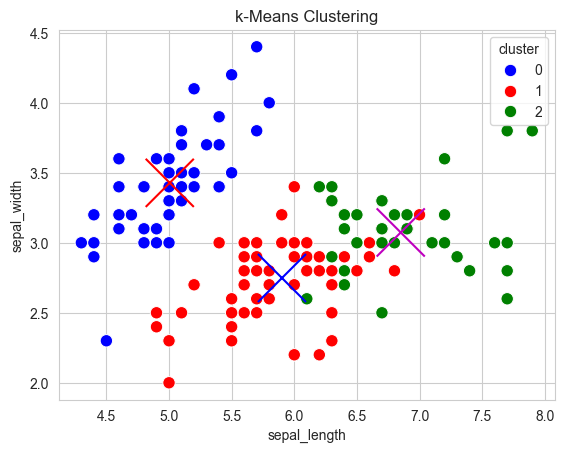

In [52]:
   
color_dict = dict({0:'blue',
                  1:'red',
                  2: 'g'})

centroid_colors=['r','b','m']
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='cluster', palette=color_dict, s=80)
plt.scatter(x_centroids, y_centroids,s=1200, marker='x', c=centroid_colors)
plt.title('k-Means Clustering')

plt.show()

In [53]:
print(model.predict(X_input))

[0 1]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


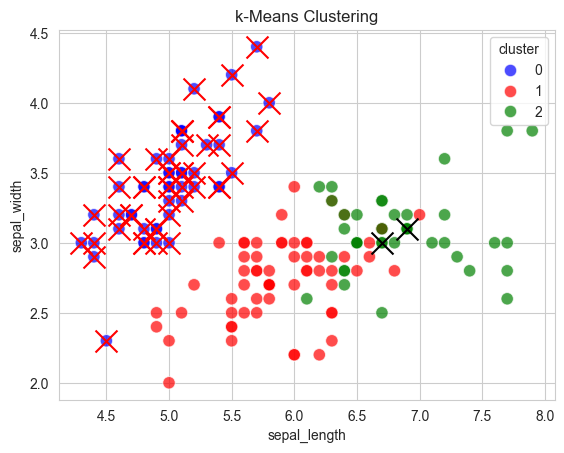

In [55]:
w1 = df[(df.cluster==0) & (df.species!='versicolor')] #.count()
w2 = df[(df.cluster==2) & (df.species!='virginica')] #.count()

color_dict = dict({0:'blue',
                  1:'red',
                  2: 'g'})


sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='cluster', palette=color_dict, s=80, alpha=0.7)

plt.scatter(w1.sepal_length, w1.sepal_width, marker='x',s=250,c='red')
plt.scatter(w2.sepal_length, w2.sepal_width, marker='x',s=250,c='black')
plt.title('k-Means Clustering')
plt.savefig('kmean-clustering-wrong',dpi=120)
plt.show()